In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import tensorflow as tf
import random
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dataset\\train_df.csv')
df_test = pd.read_csv('Dataset\\test_df.csv')
df_sample = pd.read_csv('Dataset\\sample_submission.csv')
print(df.shape)
print(df_test.shape)

(5000, 8)
(2000, 7)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                5000 non-null   int64 
 1   gender             5000 non-null   object
 2   primary_diagnosis  5000 non-null   object
 3   num_procedures     5000 non-null   int64 
 4   days_in_hospital   5000 non-null   int64 
 5   comorbidity_score  5000 non-null   int64 
 6   discharge_to       5000 non-null   object
 7   readmitted         5000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 312.6+ KB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                2000 non-null   int64 
 1   gender             2000 non-null   object
 2   primary_diagnosis  2000 non-null   object
 3   num_procedures     2000 non-null   int64 
 4   days_in_hospital   2000 non-null   int64 
 5   comorbidity_score  2000 non-null   int64 
 6   discharge_to       2000 non-null   object
dtypes: int64(4), object(3)
memory usage: 109.5+ KB


In [5]:
df.describe()

,age,num_procedures,days_in_hospital,comorbidity_score,readmitted
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,53.299000,4.46100,7.396600,2.068600,0.188000
std,20.646851,2.88606,4.025587,1.422357,0.390751
min,18.000000,0.00000,1.000000,0.000000,0.000000
25%,36.000000,2.00000,4.000000,1.000000,0.000000
50%,53.000000,4.00000,7.000000,2.000000,0.000000
75%,71.000000,7.00000,11.000000,3.000000,0.000000
max,89.000000,9.00000,14.000000,4.000000,1.000000


In [6]:
df_test.describe()

,age,num_procedures,days_in_hospital,comorbidity_score
count,2000.000000,2000.000000,2000.00000,2000.00000
mean,54.318000,4.563000,7.41950,2.05300
std,20.872631,2.846767,3.99944,1.40932
min,18.000000,0.000000,1.00000,0.00000
25%,36.000000,2.000000,4.00000,1.00000
50%,55.000000,5.000000,7.00000,2.00000
75%,72.000000,7.000000,11.00000,3.00000
max,89.000000,9.000000,14.00000,4.00000


In [7]:
df.isnull().sum()

age                  0
gender               0
primary_diagnosis    0
num_procedures       0
days_in_hospital     0
comorbidity_score    0
discharge_to         0
readmitted           0
dtype: int64

In [8]:
df_test.isnull().sum()

age                  0
gender               0
primary_diagnosis    0
num_procedures       0
days_in_hospital     0
comorbidity_score    0
discharge_to         0
dtype: int64

In [9]:
df.duplicated().sum()

4

In [10]:
df_test.duplicated().sum()

1

In [11]:
print("The shape of the dataset is:", df.shape)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

The shape of the dataset is: (5000, 8)
Number of rows: 5000
Number of columns: 8


C:\Users\medoo\AppData\Local\Temp\ipykernel_40596\2277691673.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='pastel')


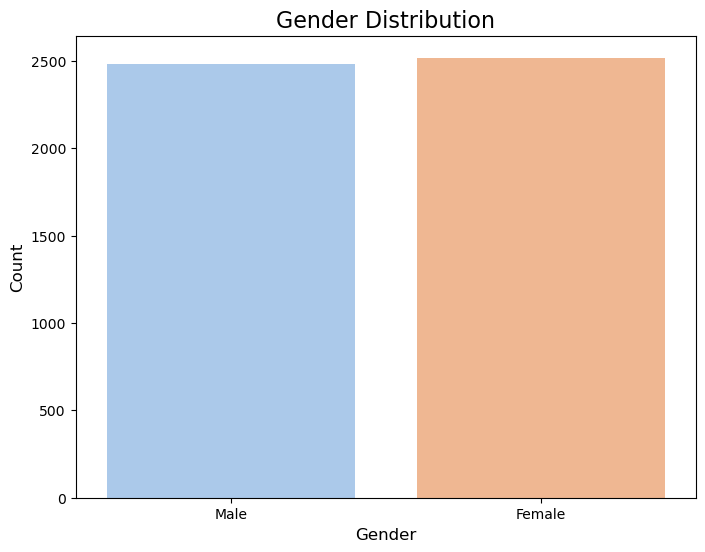

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', palette='pastel')
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

count    5000.000000
mean       53.299000
std        20.646851
min        18.000000
25%        36.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: age, dtype: float64


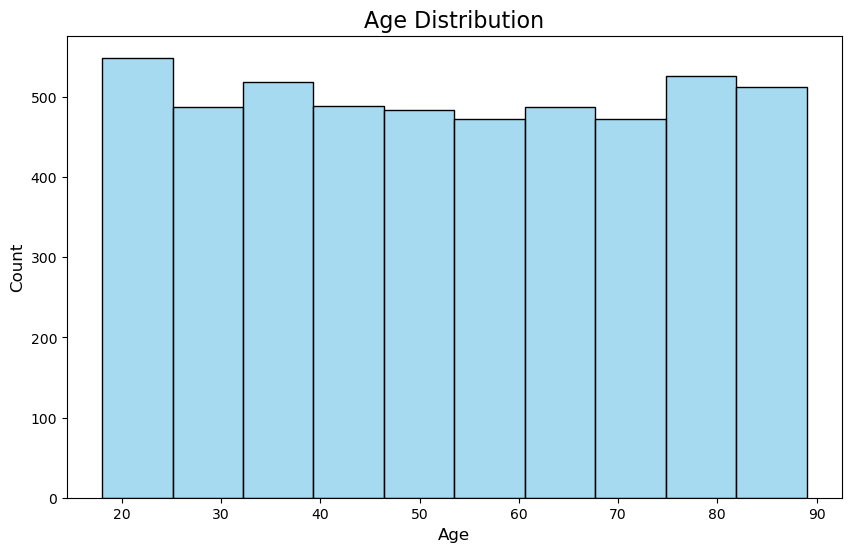

In [13]:
# Check the unique values in the age column (optional)
print(df['age'].describe())  

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=10, kde=False, color='skyblue')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

C:\Users\medoo\AppData\Local\Temp\ipykernel_40596\1701284723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='primary_diagnosis', palette='pastel')


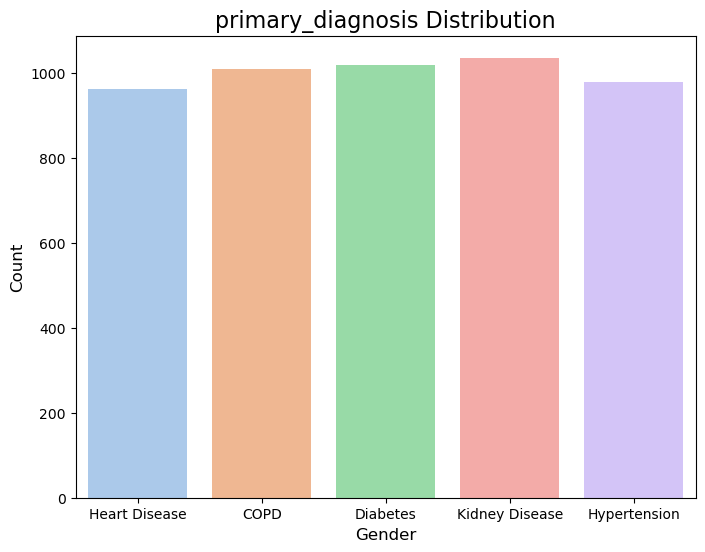

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='primary_diagnosis', palette='pastel')
plt.title('primary_diagnosis Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

C:\Users\medoo\AppData\Local\Temp\ipykernel_40596\3920803721.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='discharge_to', palette='pastel')


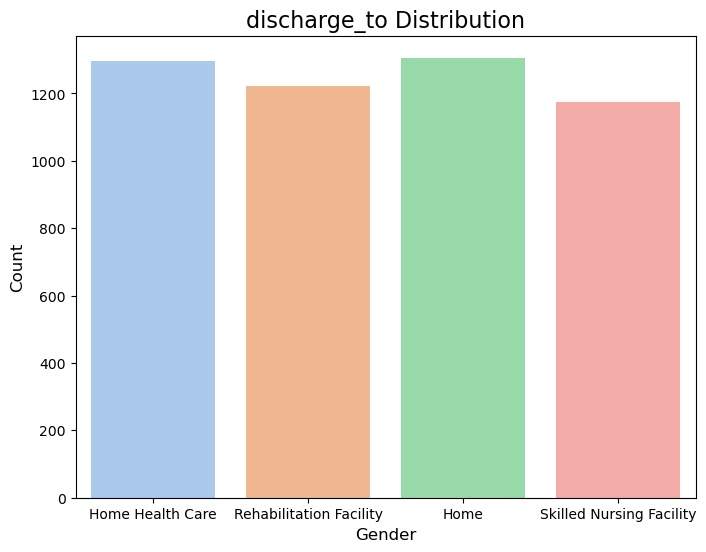

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='discharge_to', palette='pastel')
plt.title('discharge_to Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

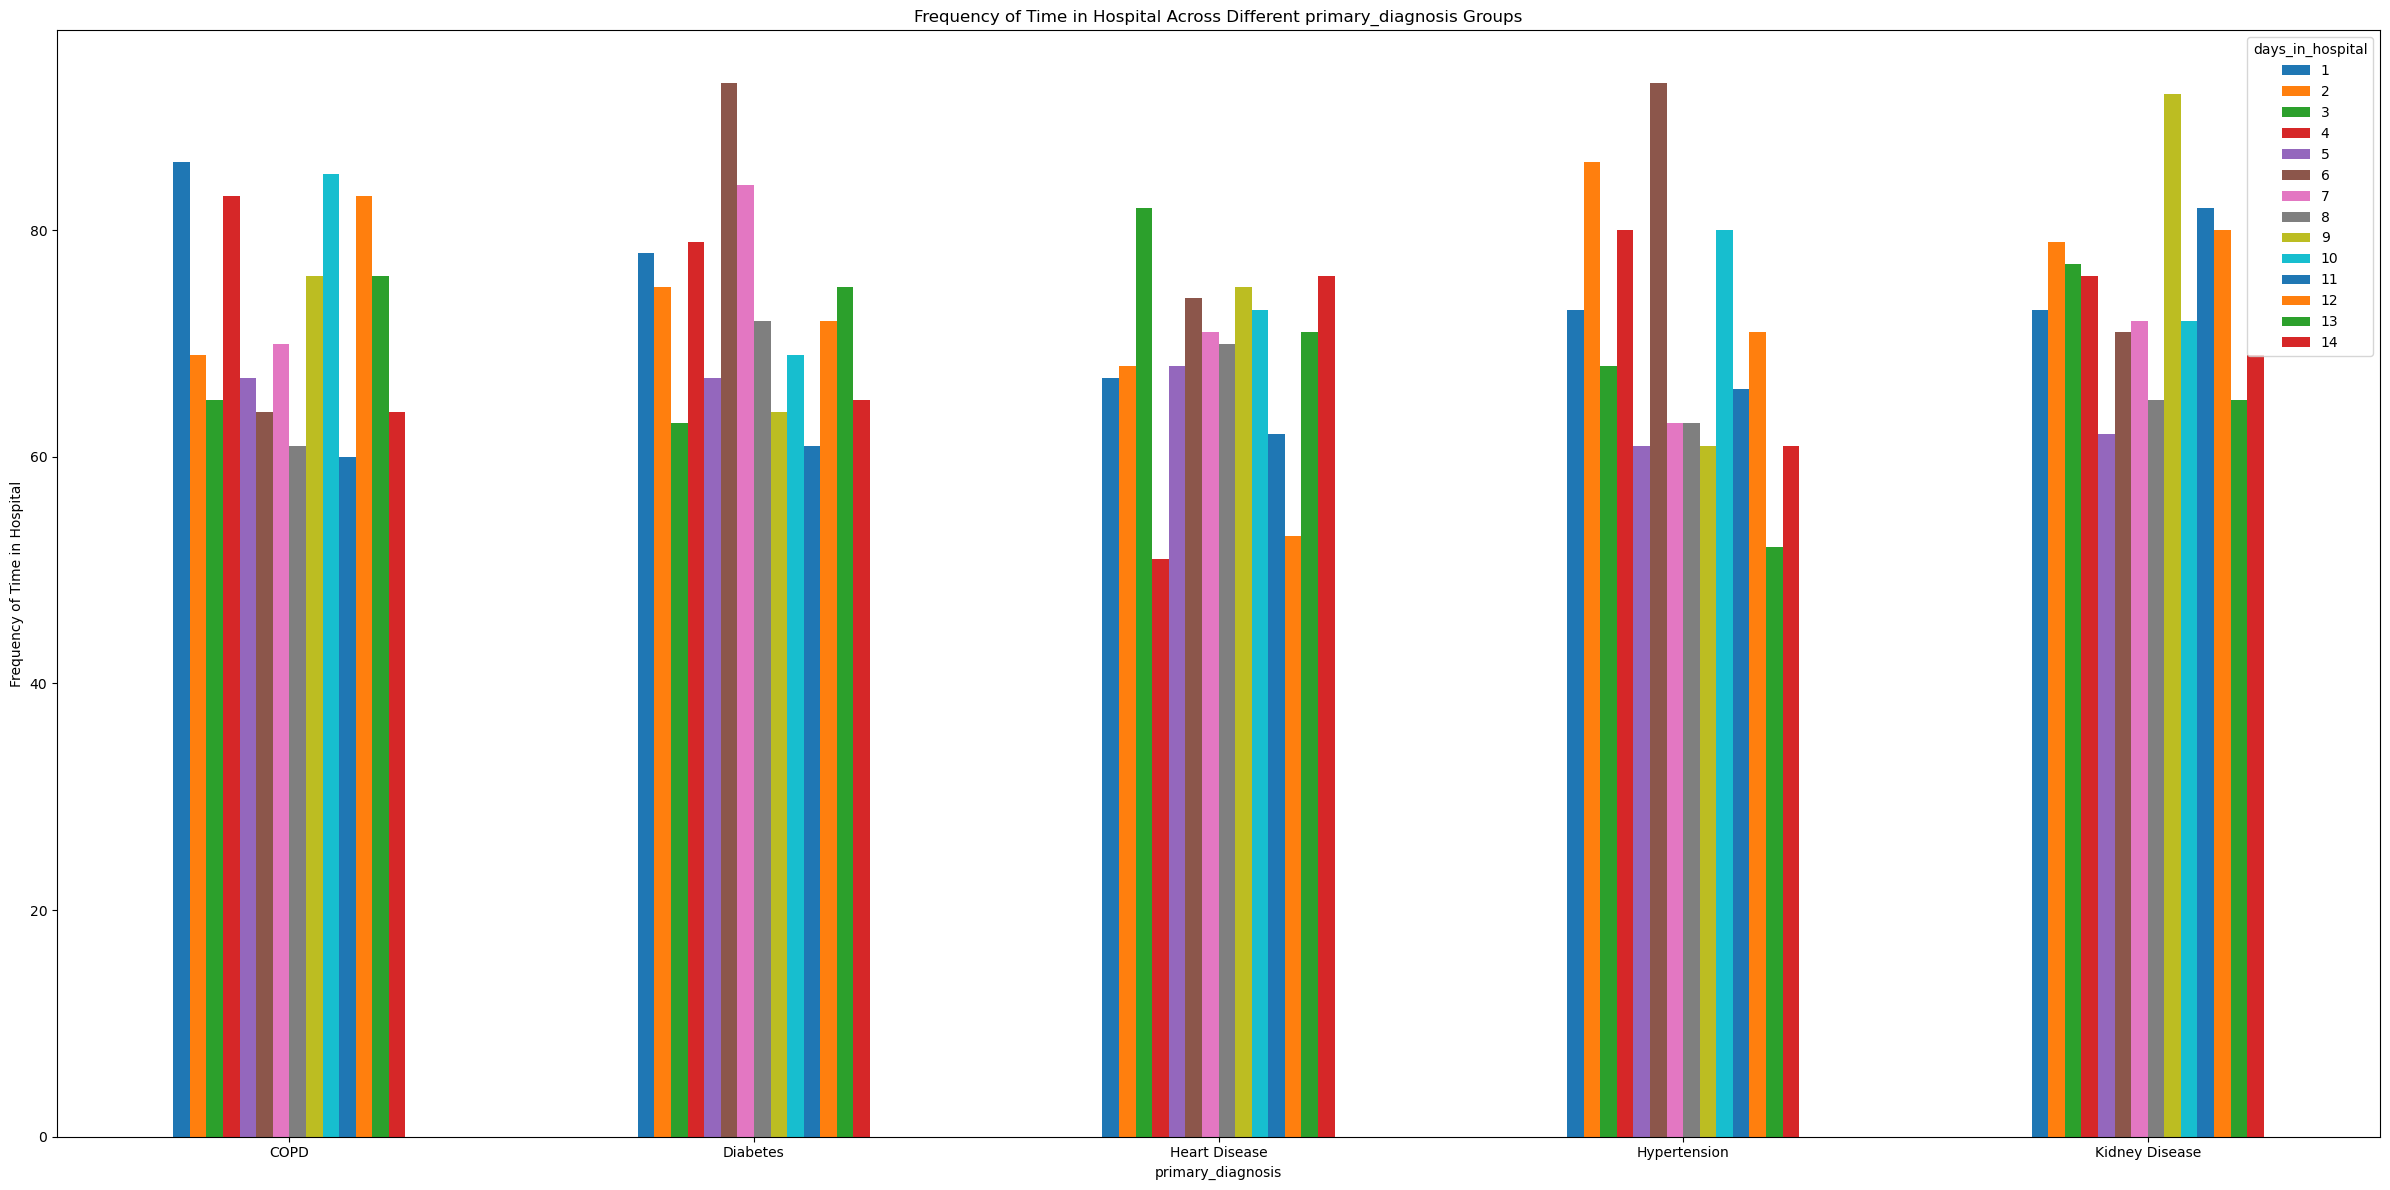

In [16]:
# Group the data by 'age' and 'time_in_hospital'
age_time_counts = df.groupby('primary_diagnosis')['days_in_hospital'].value_counts().unstack(fill_value=0)

# Plot the bar chart
age_time_counts.plot(kind='bar', figsize=(24, 12), stacked=False)

# Customize the plot
plt.xlabel('primary_diagnosis')
plt.ylabel('Frequency of Time in Hospital')
plt.title('Frequency of Time in Hospital Across Different primary_diagnosis Groups')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
df

,age,gender,primary_diagnosis,num_procedures,days_in_hospital,comorbidity_score,discharge_to,readmitted
0,69,Male,Heart Disease,1,2,1,Home Health Care,0
1,32,Female,COPD,2,13,2,Rehabilitation Facility,0
2,89,Male,Diabetes,1,7,1,Home,0
3,78,Male,COPD,9,2,2,Skilled Nursing Facility,0
4,38,Male,Diabetes,6,4,4,Rehabilitation Facility,0
...,...,...,...,...,...,...,...,...
4995,77,Female,Heart Disease,3,13,1,Rehabilitation Facility,0
4996,43,Female,Heart Disease,3,9,3,Home Health Care,0
4997,58,Female,Kidney Disease,9,11,3,Home Health Care,0
4998,53,Male,COPD,6,1,0,Rehabilitation Facility,0


In [18]:
encoded_data = pd.get_dummies(df,columns=['gender','primary_diagnosis','discharge_to'])
df = encoded_data.astype(int)

In [19]:
encoded_data = pd.get_dummies(df_test,columns=['gender','primary_diagnosis','discharge_to'])
df_test = encoded_data.astype(int)

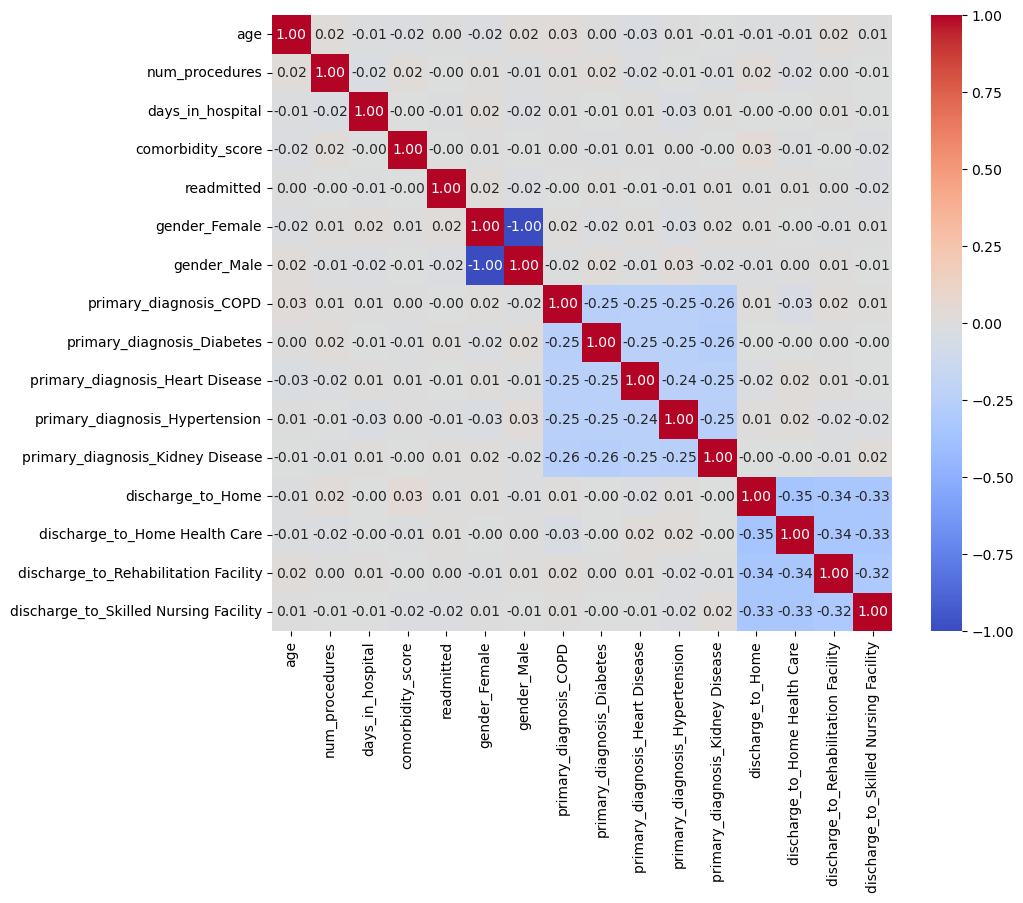

In [20]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [21]:
df.head()

,age,num_procedures,days_in_hospital,comorbidity_score,readmitted,gender_Female,gender_Male,primary_diagnosis_COPD,primary_diagnosis_Diabetes,primary_diagnosis_Heart Disease,primary_diagnosis_Hypertension,primary_diagnosis_Kidney Disease,discharge_to_Home,discharge_to_Home Health Care,discharge_to_Rehabilitation Facility,discharge_to_Skilled Nursing Facility
0,69,1,2,1,0,0,1,0,0,1,0,0,0,1,0,0
1,32,2,13,2,0,1,0,1,0,0,0,0,0,0,1,0
2,89,1,7,1,0,0,1,0,1,0,0,0,1,0,0,0
3,78,9,2,2,0,0,1,1,0,0,0,0,0,0,0,1
4,38,6,4,4,0,0,1,0,1,0,0,0,0,0,1,0


In [22]:
df_test.head()

,age,num_procedures,days_in_hospital,comorbidity_score,gender_Female,gender_Male,primary_diagnosis_COPD,primary_diagnosis_Diabetes,primary_diagnosis_Heart Disease,primary_diagnosis_Hypertension,primary_diagnosis_Kidney Disease,discharge_to_Home,discharge_to_Home Health Care,discharge_to_Rehabilitation Facility,discharge_to_Skilled Nursing Facility
0,52,3,9,3,0,1,0,0,1,0,0,1,0,0,0
1,47,2,4,0,1,0,0,1,0,0,0,0,0,0,1
2,72,7,12,4,1,0,0,0,1,0,0,1,0,0,0
3,18,5,14,3,1,0,1,0,0,0,0,1,0,0,0
4,32,9,2,4,0,1,0,0,1,0,0,0,0,1,0


In [23]:
df['readmitted'].value_counts()

readmitted
0    4060
1     940
Name: count, dtype: int64

C:\Users\medoo\AppData\Local\Temp\ipykernel_40596\3732711446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['readmitted'],palette='icefire')


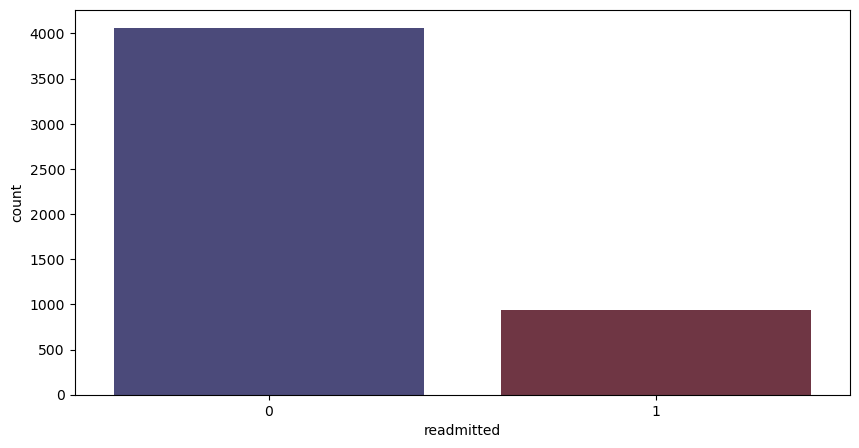

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['readmitted'],palette='icefire')
plt.show()

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train = df.drop('readmitted',axis=1)
y_train = df['readmitted']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Reasnmbled class Distruption")
print(y_resampled.value_counts())


Reasnmbled class Distruption
readmitted
0    4060
1    4060
Name: count, dtype: int64


C:\Users\medoo\AppData\Local\Temp\ipykernel_40596\3763037106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled,palette='icefire')


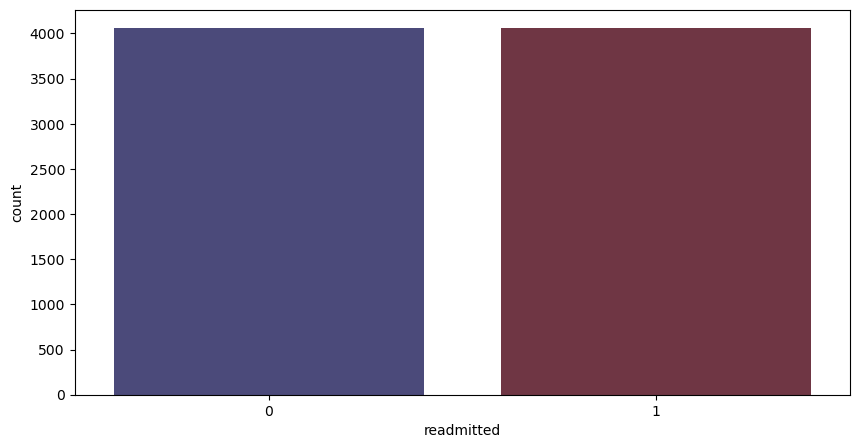

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x=y_resampled,palette='icefire')
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_resampled = scaler.fit_transform(X_resampled)

df_test = scaler.fit_transform(df_test)

In [28]:
X_train, X_validation, y_train, y_validation = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [29]:
print(X_train.shape)
print(X_validation.shape)
print(y_train.shape)
print(y_validation.shape)

(6496, 15)
(1624, 15)
(6496,)
(1624,)


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import random


model = Sequential()

model.add(Dense(128,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(32,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [31]:
seed_value=42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(42)

In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [33]:
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint('best_model_weights.keras', 
                             monitor='val_loss', 
                             save_best_only=True,
                             verbose=1)


In [34]:
history = model.fit(
    X_train, y_train,
    epochs=150,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stopping, checkpoint]
    )

Epoch 1/150
189/203 [==========================>...] - ETA: 0s - loss: 0.4649 - accuracy: 0.7814
Epoch 1: val_loss improved from inf to 0.33355, saving model to best_model_weights.keras
203/203 [==============================] - 2s 4ms/step - loss: 0.4573 - accuracy: 0.7865 - val_loss: 0.3335 - val_accuracy: 0.8732
Epoch 2/150
201/203 [============================>.] - ETA: 0s - loss: 0.3575 - accuracy: 0.8489
Epoch 2: val_loss improved from 0.33355 to 0.32030, saving model to best_model_weights.keras
203/203 [==============================] - 1s 3ms/step - loss: 0.3566 - accuracy: 0.8493 - val_loss: 0.3203 - val_accuracy: 0.8756
Epoch 3/150
190/203 [===========================>..] - ETA: 0s - loss: 0.3407 - accuracy: 0.8584
Epoch 3: val_loss did not improve from 0.32030
203/203 [==============================] - 1s 3ms/step - loss: 0.3398 - accuracy: 0.8590 - val_loss: 0.3244 - val_accuracy: 0.8756
Epoch 4/150
188/203 [==========================>...] - ETA: 0s - loss: 0.3323 - accurac

In [35]:
val_loss,val_acc = model.evaluate(X_validation,y_validation)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

51/51 [==============================] - 0s 2ms/step - loss: 0.3161 - accuracy: 0.8756
Validation Loss: 0.3161263167858124
Validation Accuracy: 0.8756157755851746


In [36]:
# Predict probabilities
y_pred = model.predict(X_validation)

# # Convert probabilities to binary labels
# y_pred = (y_pred_prob > 0.5).astype(int)
# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)


51/51 [==============================] - 0s 925us/step


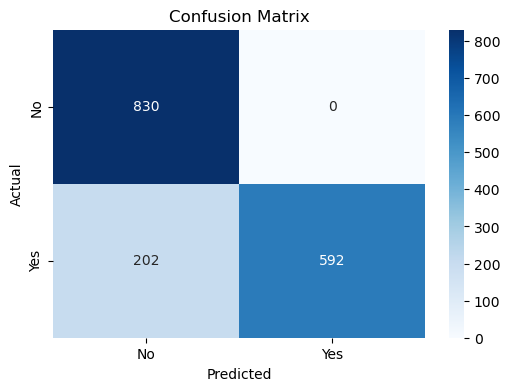

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_validation, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


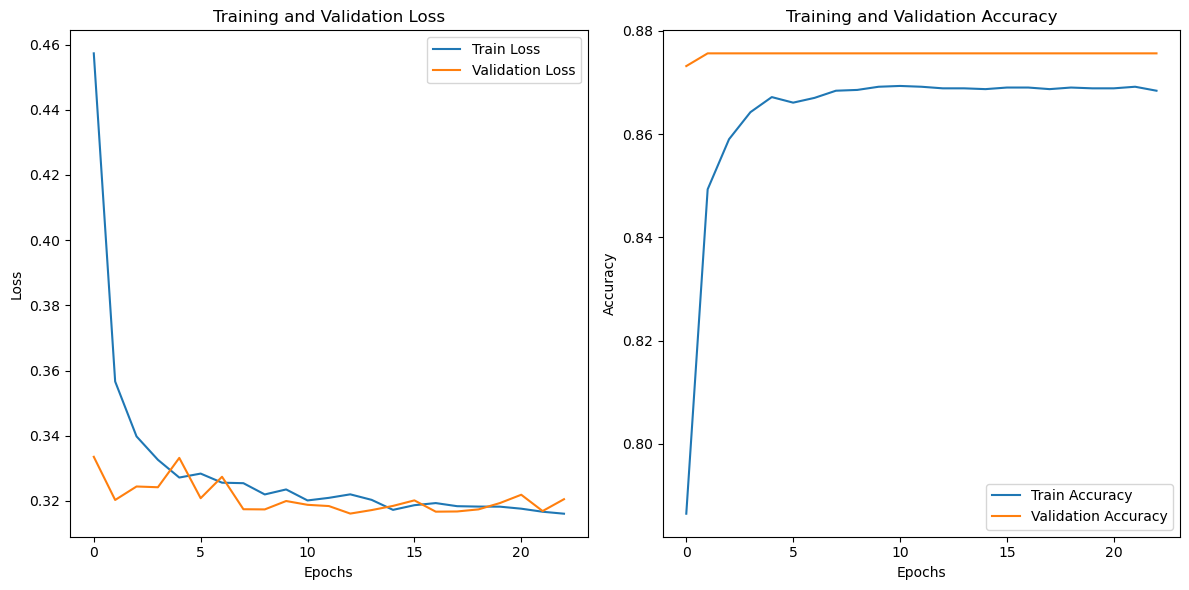

In [38]:
import matplotlib.pyplot as plt

# Extract loss and accuracy values from the history object
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Plot the loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [39]:
df_test

array([[-0.1110823 , -0.54918117,  0.39527919, ..., -0.55270519,
        -0.5881284 , -0.57504086],
       [-0.35069035, -0.90054468, -0.8552086 , ..., -0.55270519,
        -0.5881284 ,  1.73900686],
       [ 0.84734993,  0.85627288,  1.14557187, ..., -0.55270519,
        -0.5881284 , -0.57504086],
       ...,
       [ 1.66201733, -0.90054468, -0.10491593, ..., -0.55270519,
         1.70030897, -0.57504086],
       [ 1.37448766, -0.19781766, -0.8552086 , ..., -0.55270519,
         1.70030897, -0.57504086],
       [-0.68614163,  0.50490937, -0.60511104, ..., -0.55270519,
        -0.5881284 ,  1.73900686]])

In [40]:
# read data from the test file
X_unseen = df_test

In [41]:

model.load_weights('best_model_weights.keras')
predictions = model.predict(X_unseen)
binary_predictions = (predictions > 0.5).astype(int)
# Print the predictions
print("Probabilities:", predictions.flatten())
print("Binary Predictions:", binary_predictions.flatten())


63/63 [==============================] - 0s 905us/step
Probabilities: [0.9764623  0.99817073 0.914151   ... 0.9946892  0.99926156 0.9809787 ]
Binary Predictions: [1 1 1 ... 1 1 1]


In [42]:
predictions_df = pd.DataFrame(data=binary_predictions, columns=['Prediction'])
predictions_df.index = range(1, len(binary_predictions) + 1)
predictions_df.index.name = 'Sample_ID'

predictions_df.to_csv('predictions.csv', index=True)
# Display the DataFrame
print(predictions_df)

           Prediction
Sample_ID            
1                   1
2                   1
3                   1
4                   1
5                   1
...               ...
1996                1
1997                1
1998                1
1999                1
2000                1

[2000 rows x 1 columns]


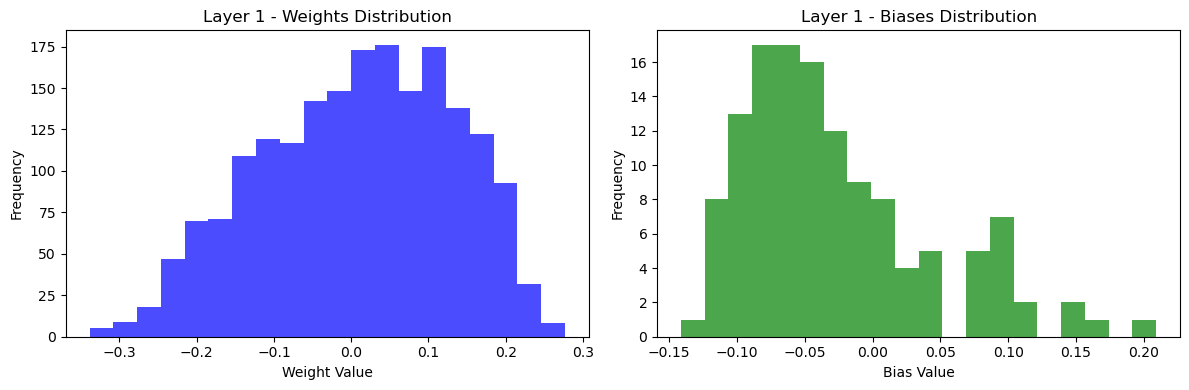

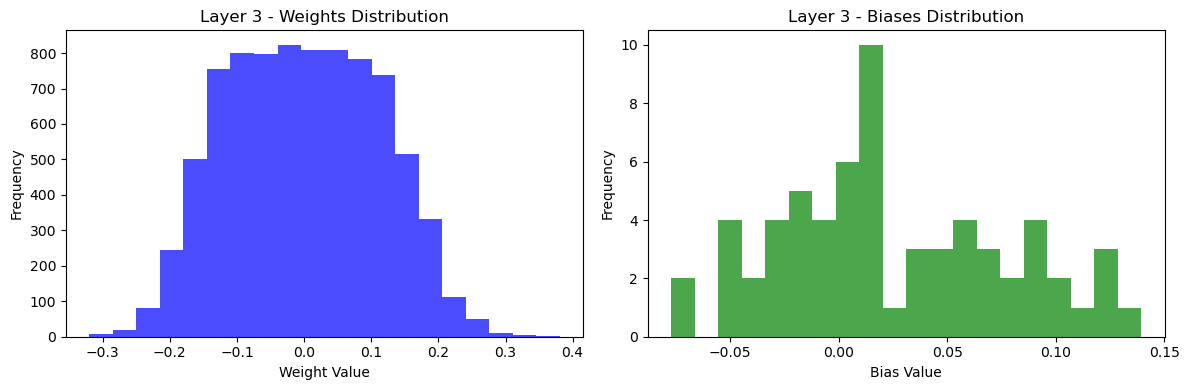

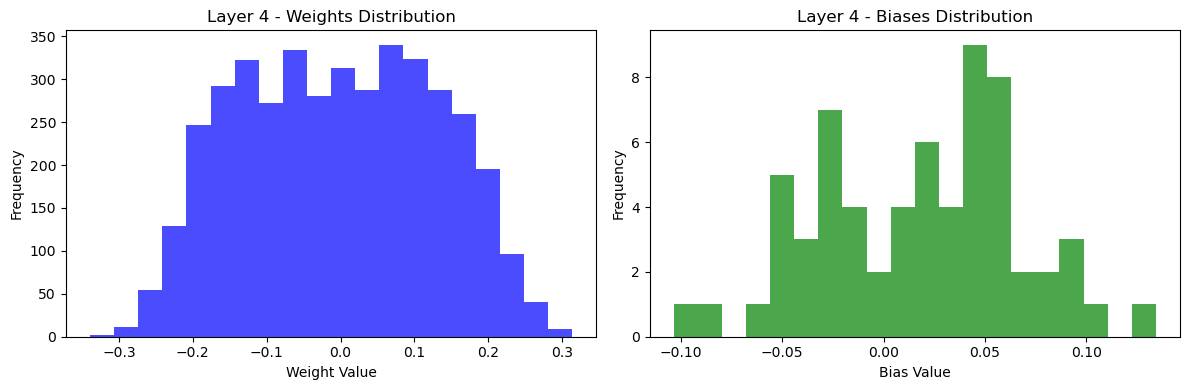

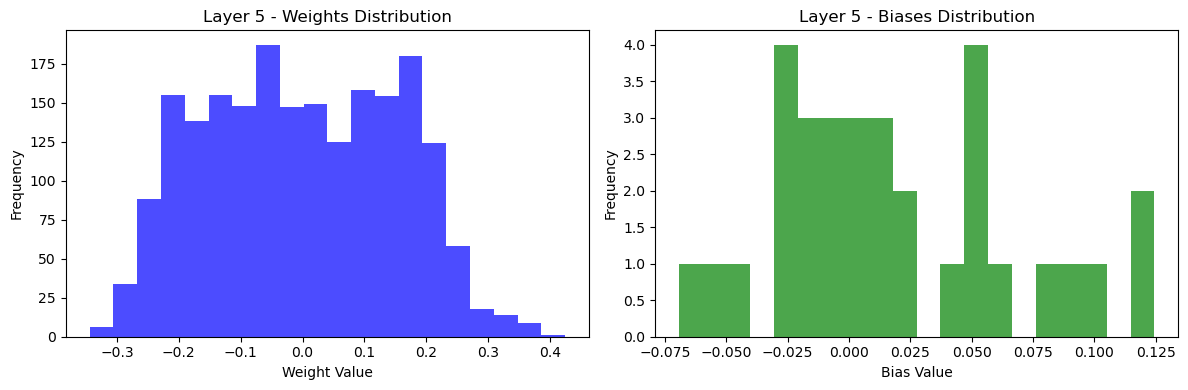

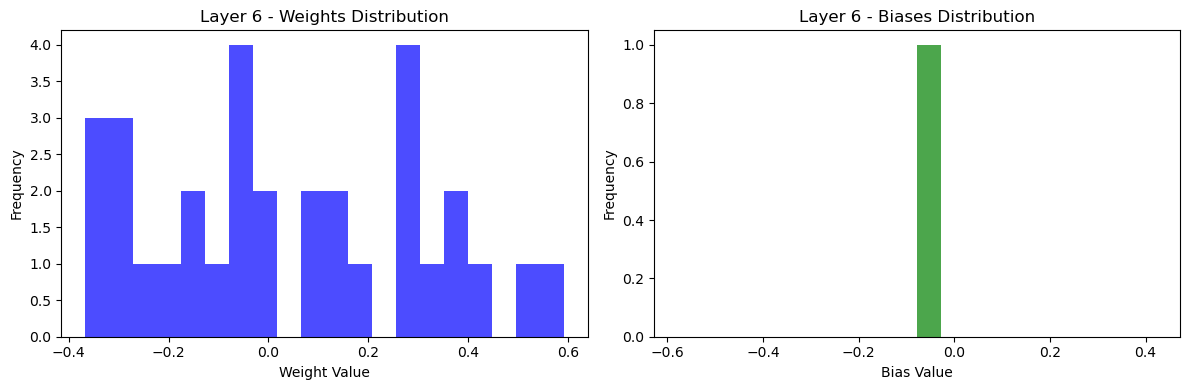

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot weights and biases
def plot_weights_and_biases(model):
    for i, layer in enumerate(model.layers):
        if len(layer.get_weights()) > 0:
            weights, biases = layer.get_weights()
            
            # Plot weights
            plt.figure(figsize=(12, 4))
            
            # Weights
            plt.subplot(1, 2, 1)
            plt.hist(weights.flatten(), bins=20, color='blue', alpha=0.7)
            plt.title(f"Layer {i + 1} - Weights Distribution")
            plt.xlabel("Weight Value")
            plt.ylabel("Frequency")
            
            # Biases
            plt.subplot(1, 2, 2)
            plt.hist(biases.flatten(), bins=20, color='green', alpha=0.7)
            plt.title(f"Layer {i + 1} - Biases Distribution")
            plt.xlabel("Bias Value")
            plt.ylabel("Frequency")
            
            plt.tight_layout()
            plt.show()

# Call the function to visualize weights and biases
plot_weights_and_biases(model)